In [27]:
# fr5 robot의 각도를 joint 좌표로 변환하는 코드

import os
import json
import math
import numpy as np

def get_transformation_matrix(fr5_dh_parameters, theta):
    a = fr5_dh_parameters['a']
    d = fr5_dh_parameters['d']
    alpha = math.radians(fr5_dh_parameters['alpha'])
    theta = math.radians(fr5_dh_parameters['theta'] + theta)
    
    return np.array([
        [np.cos(theta), -np.sin(theta) * np.cos(alpha), np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
        [np.sin(theta), np.cos(theta) * np.cos(alpha), -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
        [0, np.sin(alpha), np.cos(alpha), d],
        [0, 0, 0, 1]
    ])

fr5_dh_parameters = [
    {'alpha': 90, 'a': 0, 'd': 0.152, 'theta': 0},
    {'alpha': 0, 'a': -0.425, 'd': 0, 'theta': 0},
    {'alpha': 0, 'a': -0.395, 'd': 0, 'theta': 0},
    {'alpha': 90, 'a': 0, 'd': 0.102, 'theta': 0},
    {'alpha': -90, 'a': 0, 'd': 0.102, 'theta': 0},
    {'alpha': 0, 'a': 0, 'd': 0.100, 'theta': 0}
]

angle_path = '/home/najo/NAS/DIP/datasets/FR5_model/angle'
save_path = '/home/najo/NAS/DIP/datasets/FR5_model/joint'
angle_file = [f for f in os.listdir(angle_path) if f.endswith('.json')]

for i in range(len(angle_file)):
    with open(os.path.join(angle_path, angle_file[i]), 'r') as file:
                data = json.load(file)
                
    base_coordinate = np.array([[0], 
                        [0], 
                        [0], 
                        [1]])

    T_1 = get_transformation_matrix(fr5_dh_parameters[0], data[0])
    T_2 = get_transformation_matrix(fr5_dh_parameters[1], data[1])
    T_3 = get_transformation_matrix(fr5_dh_parameters[2], data[2])
    T_4 = get_transformation_matrix(fr5_dh_parameters[3], data[3])
    T_5 = get_transformation_matrix(fr5_dh_parameters[4], data[4])
    T_6 = get_transformation_matrix(fr5_dh_parameters[5], data[5])

    JOINT_1 = T_1 @ base_coordinate
    JOINT_2 = T_1 @ T_2 @ base_coordinate
    JOINT_3 = T_1 @ T_2 @ T_3 @ base_coordinate
    JOINT_4 = T_1 @ T_2 @ T_3 @ T_4 @ base_coordinate
    JOINT_5 = T_1 @ T_2 @ T_3 @ T_4 @ T_5 @ base_coordinate
    JOINT_6 = T_1 @ T_2 @ T_3 @ T_4 @ T_5 @ T_6 @ base_coordinate

    # json 파일 저장하기
    joint_data = [
        JOINT_1[:3, 0].tolist(),
        JOINT_2[:3, 0].tolist(),
        JOINT_3[:3, 0].tolist(),
        JOINT_4[:3, 0].tolist(),
        JOINT_5[:3, 0].tolist(),
        JOINT_6[:3, 0].tolist()
    ]

    with open(os.path.join(save_path, angle_file[i]), 'w') as file:
        json.dump(joint_data, file, indent=4)
print("DONE")

DONE


In [1]:
# meca robot의 joint 좌표를 camera 좌표로 변환하는 코드

import math
import cv2
import numpy as np
# MECA ROBOT

def get_transformation_matrix(fr5_dh_parameters, theta):
    a = fr5_dh_parameters['a']
    d = fr5_dh_parameters['d']
    alpha = math.radians(fr5_dh_parameters['alpha'])
    theta = math.radians(fr5_dh_parameters['theta'] + theta)
    
    return np.array([
        [np.cos(theta), -np.sin(theta) * np.cos(alpha), np.sin(theta) * np.sin(alpha), a * np.cos(theta)],
        [np.sin(theta), np.cos(theta) * np.cos(alpha), -np.cos(theta) * np.sin(alpha), a * np.sin(theta)],
        [0, np.sin(alpha), np.cos(alpha), d],
        [0, 0, 0, 1]
    ])

fr5_dh_parameters = [
    {'alpha': -90, 'a': 0, 'd': 0.135, 'theta': 0},
    {'alpha': 0, 'a': 0.135, 'd': 0, 'theta': -90},
    {'alpha': -90, 'a': 0.038, 'd': 0, 'theta': 0},
    {'alpha': 90, 'a': 0, 'd': 0.120, 'theta': 0},
    {'alpha': -90, 'a': 0, 'd': 0, 'theta': 0},
    {'alpha': 0, 'a': 0, 'd': 0.070, 'theta': 0}
]

base_coordinate = np.array([[0], 
                    [0], 
                    [0], 
                    [1]])

data = [90, 0, 0, 0, 0, 0]

T_1 = get_transformation_matrix(fr5_dh_parameters[0], data[0])
T_2 = get_transformation_matrix(fr5_dh_parameters[1], data[1])
T_3 = get_transformation_matrix(fr5_dh_parameters[2], data[2])
T_4 = get_transformation_matrix(fr5_dh_parameters[3], data[3])
T_5 = get_transformation_matrix(fr5_dh_parameters[4], data[4])
T_6 = get_transformation_matrix(fr5_dh_parameters[5], data[5])

JOINT_1 = T_1 @ base_coordinate
JOINT_2 = T_1 @ T_2 @ base_coordinate
JOINT_3 = T_1 @ T_2 @ T_3 @ base_coordinate
JOINT_4 = T_1 @ T_2 @ T_3 @ T_4 @ base_coordinate
JOINT_5 = T_1 @ T_2 @ T_3 @ T_4 @ T_5 @ base_coordinate
JOINT_6 = T_1 @ T_2 @ T_3 @ T_4 @ T_5 @ T_6 @ base_coordinate

joint_coordinate = np.array([
        base_coordinate[:3, 0],
        JOINT_1[:3, 0],
        JOINT_2[:3, 0],
        JOINT_3[:3, 0],
        JOINT_4[:3, 0],
        JOINT_5[:3, 0],
        JOINT_6[:3, 0]
    ], dtype=np.float32) * 1000 # m to mm

print(f'joint_coordinate : {joint_coordinate}')
Rvec = np.array([[math.radians(97)], [math.radians(98)], [math.radians(-45)]], dtype=np.float32)
Tvec = np.array([[-0.0005], [-0.0005], [0.740]], dtype=np.float32) * 1000 # m to mm 

rotation_matrix, _ = cv2.Rodrigues(Rvec)
print(f'rotation_matrix : {rotation_matrix}')
print(f'translation_matrix : {Tvec}')

camera_coordinate = np.dot(rotation_matrix, joint_coordinate.T).T + Tvec.T
print(f'camera Coordinates:\n {camera_coordinate}')

fx = 740.644
fy = 740.978
cx = 966.584
cy = 622.013
k1 = -0.0020052656237788662
k2 = -0.04980747919203068
p1 = -4.98792412492261e-06
p2 = -7.581211926911395e-05
k3 = 0.016309955615442823

camera_matrix = np.array([[fx, 0, cx],
                        [0, fy, cy],
                        [0, 0, 1]], dtype=np.float32)

dist_coeffs = np.array([k1, k2, p1, p2, k3], dtype=np.float32)

normalized_points = []
for point in camera_coordinate:
        x_camera, y_camera, z_camera = point
        x_normalized = x_camera / z_camera
        y_normalized = y_camera / z_camera
        normalized_points.append([x_normalized, y_normalized])
normalized_points = np.array(normalized_points)
print(f"Normalized Space Coordinates:\n {normalized_points}")

pixel_estimated_coordinates = []
for norm_point in normalized_points:
    x_norm, y_norm = norm_point
    x_pixel = x_norm * fx + cx
    y_pixel = y_norm * fy + cy
    pixel_estimated_coordinates.append([x_pixel, y_pixel])
pixel_estimated_coordinates = np.array(pixel_estimated_coordinates)
print("Estimated Pixel Coordinates:\n", pixel_estimated_coordinates)

joint_coordinate : [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.3500000e+02]
 [8.2663656e-15 8.2663656e-15 2.7000000e+02]
 [1.0593195e-14 1.0593195e-14 3.0800000e+02]
 [1.0593195e-14 1.2000000e+02 3.0800000e+02]
 [1.0593195e-14 1.2000000e+02 3.0800000e+02]
 [1.0593195e-14 1.9000000e+02 3.0800000e+02]]
rotation_matrix : [[-0.0058054   0.99993736  0.00957191]
 [ 0.64443207  0.01106039 -0.76458156]
 [-0.76463956  0.00172974 -0.6444559 ]]
translation_matrix : [[-5.0e-01]
 [-5.0e-01]
 [ 7.4e+02]]
camera Coordinates:
 [[-5.00000000e-01 -5.00000000e-01  7.40000000e+02]
 [ 7.92207837e-01 -1.03718513e+02  6.52998474e+02]
 [ 2.08441567e+00 -2.06937027e+02  5.65996887e+02]
 [ 2.44814825e+00 -2.35991119e+02  5.41507568e+02]
 [ 1.22440636e+02 -2.34663879e+02  5.41715149e+02]
 [ 1.22440636e+02 -2.34663879e+02  5.41715149e+02]
 [ 1.92436249e+02 -2.33889648e+02  5.41836243e+02]]
Normalized Space Coordinates:
 [[-0.00067568 -0.00067568]
 [ 0.00121318 -0.15883423]
 [ 0.00

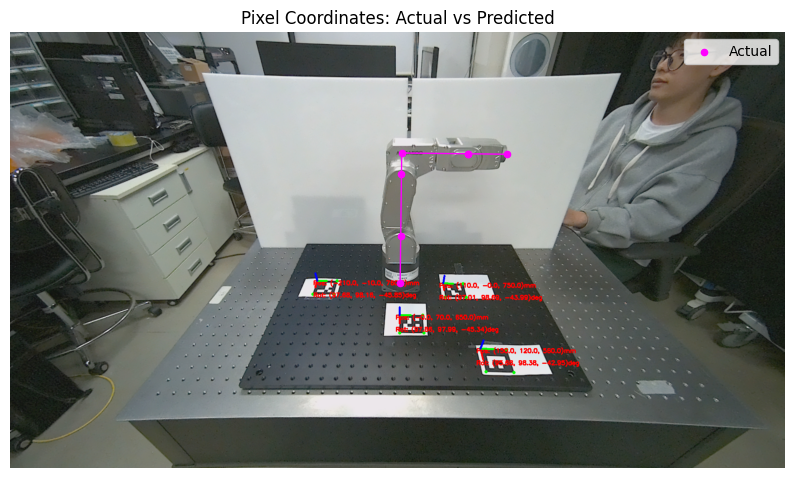

In [6]:
import matplotlib.pyplot as plt

# 실제 좌표와 예측 좌표 비교
image = cv2.imread("/home/najo/NAS/DIP/datasets/FR5_robot/Robot_joint_inference/ref_Aruco_tvec_rvec2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.scatter(pixel_estimated_coordinates[:, 0], pixel_estimated_coordinates[:, 1], s=20, color='magenta', label='Actual')
plt.plot(pixel_estimated_coordinates[:, 0], pixel_estimated_coordinates[:, 1], color='magenta', linewidth=1)
plt.legend()
plt.title("Pixel Coordinates: Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()
